In [4]:
from Ising import *
%matplotlib notebook

In [2]:
I = Ising(dimension=2,N_spins=100,boundary='periodic')
I.average_magnetization()
I_fin = I.copy()

In [3]:
I_fin,df = evolve(I_fin,k=2,t_max=1000000,check_time=1,log_time=10000,max_updates=10000000)
I_fin.average_magnetization()

 15%|█▌        | 151772/1000000 [00:16<01:54, 7408.17it/s] 

KeyboardInterrupt: 

 15%|█▌        | 151772/1000000 [00:30<01:54, 7408.17it/s]

<IPython.core.display.Javascript object>


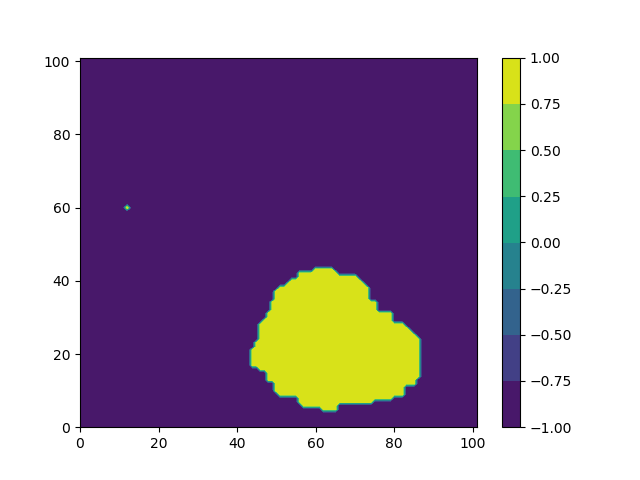

In [10]:
plt.figure()
plt.contourf(I_fin.view())
plt.colorbar()

<IPython.core.display.Javascript object>


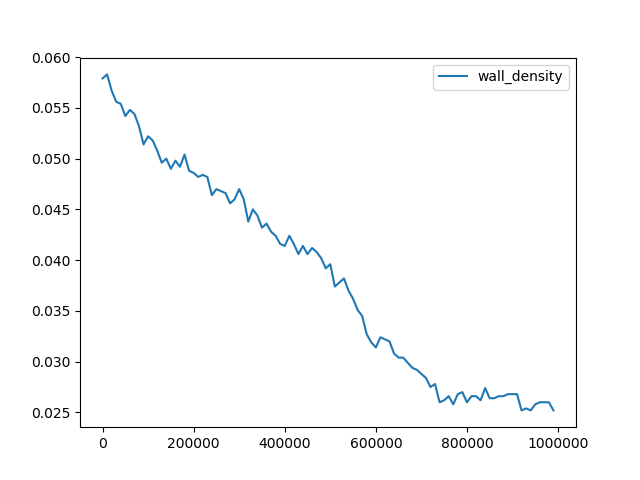

In [12]:
keys = ['spec_E', 'm', 'acceptance','wall_density']

plt.figure()
for key in keys[-1:]:
    plt.plot(df['step'],df[key],label=key)
plt.legend()

100%|██████████| 100000/100000 [00:01<00:00, 69232.71it/s]


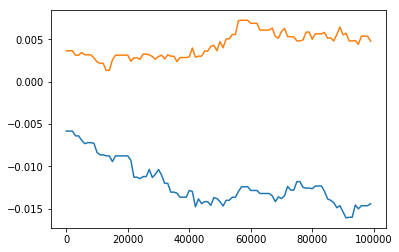

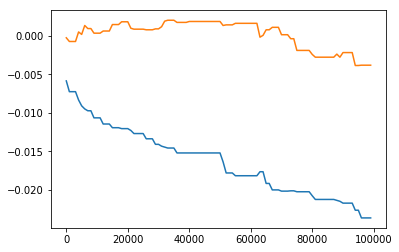

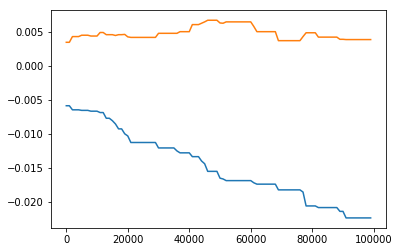

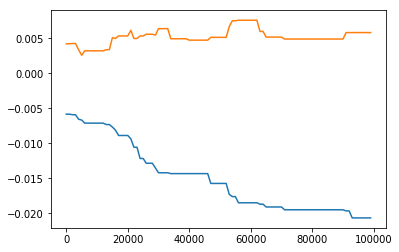

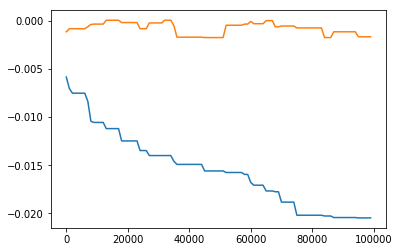

In [37]:
ks = [0.01, 0.1, 1, 10, 100]
for k in ks:
    I_fin,t_h,a_h,e_h,m_h = evolve(I,k=k,t_max=100000,check_time=1000)
    plt.figure()
    plt.plot(t_h,np.array(e_h)/(k*len(I.free_index_list)))
    plt.plot(t_h,np.array(m_h))

In [4]:
ks = np.linspace(0.001,10,100)
ms = []

for i,k in enumerate(ks):
    if i%10 == 0:
        print(i)
    I_fin,t_h,a_h,e_h,m_h = evolve(I,k=k,t_max=100000,check_time=1)
    ms.append(np.mean(m_h[:-10000]))

100%|██████████| 100000/100000 [00:07<00:00, 13990.25it/s]


Text(0, 0.5, 'm')

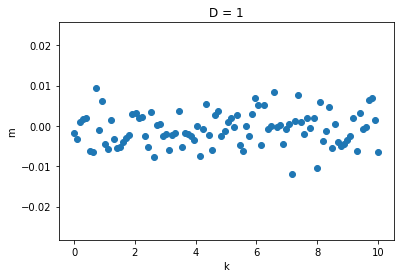

In [43]:
plt.figure()
plt.scatter(ks,ms)
plt.title('D = 1')
plt.xlabel('k')
plt.ylabel('m')

Text(0, 0.5, 'm')

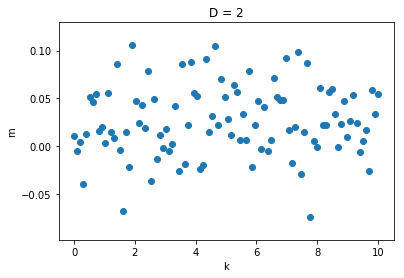

In [5]:
plt.figure()
plt.scatter(ks,ms)
plt.title('D = 2')
plt.xlabel('k')
plt.ylabel('m')

In [7]:
I_fin,t_h,a_h,e_h,m_h = evolve(I,k=100,t_max=1000000,check_time=1)
print(np.mean(m_h[:-10000]))

100%|██████████| 1000000/1000000 [01:06<00:00, 15117.66it/s]


0.23085297474747463


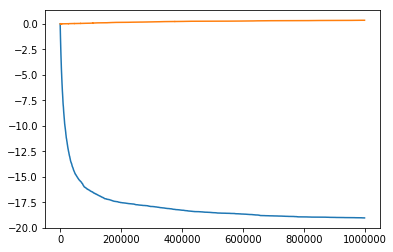

In [8]:
k = 10
plt.figure()
plt.plot(t_h,np.array(e_h)/(k*len(I.free_index_list)))
plt.plot(t_h,np.array(m_h))

## Theoretical computations

In [11]:
def p_1(k,z):
    return np.exp(-4*z*k)

def p_2(k,z):
    return np.exp(-4*(z - 2)*k)

def seed_ratio_1(k,z):
    return p_1(k,z)/(1 + p_1(k,z))

def seed_ratio_2(k,z):
    return p_1(k,z)/(1 + p_1(k,z) - p_2(k,z)*z)

def seed_ratio_3(k,z):
    return p_1(k,z)/(1 + (z + 1)*p_1(k,z) - z*p_2(k,z))

<IPython.core.display.Javascript object>


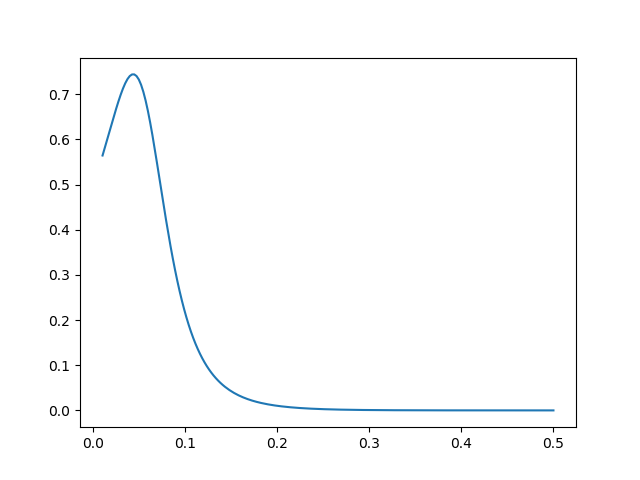

In [43]:
# ks = np.linspace(0.3,2,1000)
z = 6

plt.figure()
# plt.plot(ks,seed_ratio_1(ks,z))
plt.plot(ks,seed_ratio_3(ks,z))

<IPython.core.display.Javascript object>


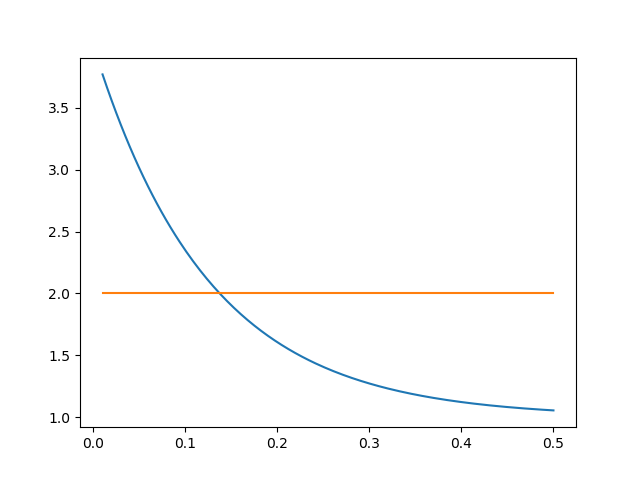

In [39]:
%matplotlib notebook
ks = np.linspace(0.01,0.5,200)
z = 2
plt.figure()
plt.plot(ks,(z + 1)*p_1(ks,z) + 1)
plt.plot(ks,z*p_2(ks,z))

<IPython.core.display.Javascript object>


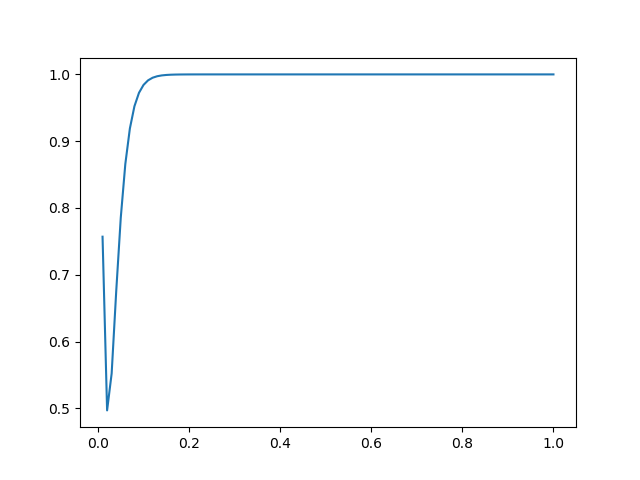

In [37]:
plt.figure()
z = 18
plt.plot(ks,1 + (z + 1)*p_1(ks,z) - z*p_2(ks,z))
